In [1]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import mean_squared_error

In [2]:
# Load Dataset

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(train_data.shape, test_data.shape)

(4209, 378) (4209, 377)


In [3]:
# View first 5 rows of train data
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
train_data.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [6]:
train_data['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

#### Remove those variables with variance being equal to zero:

In [7]:
# get number of unique values for each column
unique_counts = train_data.drop('y',axis=1).nunique()

# record columns to delete
col_to_del = list(unique_counts[unique_counts==1].index)
print("Columns with zero variance include:", col_to_del)

Columns with zero variance include: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [8]:
def del_zero_variance(data,col_to_del):
    """
    This function drop selected columns from dataframe
    """ 
    data.drop(col_to_del, axis=1, inplace=True)
    
# drop columns with zero variance for train data
del_zero_variance(train_data, col_to_del)
print("The shape of train data:",train_data.shape)

# drop columns with zero variance for test data
del_zero_variance(test_data, col_to_del)
print("The shape of test data:",test_data.shape)

The shape of train data: (4209, 366)
The shape of test data: (4209, 365)


#### Check for null and unique values for test and train sets:

In [9]:
# Checking for missing values and unique values
def check_null(data):
    """
    This function return a list of columns which contain null values.
    """
    null_columns = data.columns[data.isnull().any()]
    null_sum = data[null_columns].isnull().sum()
    if len(null_columns)>0:
        return pd.DataFrame({'null_columns': null_columns, 'null_sum': null_sum})
    else:
        return "This dataset doesn't have null value."


def check_unique(data):
    """
    This function return a dataframe of number of unique values and those unique values for each column of input dataset.
    """
    # create a dataframe which gives the number of unique values for every feature from the data
    df_unique = pd.DataFrame(data.nunique(), columns=['unique_counts']) 
    
    # create a new column to the dataframe to provide a list of unique values of their corresponding features
    df_unique['unique_values'] =  df_unique.index
    df_unique['unique_values'] = df_unique['unique_values'].apply(lambda x : data[x].unique())
    
    return df_unique


In [10]:
# Check null values for train data
check_null(train_data)

"This dataset doesn't have null value."

In [11]:
# Check null values for test data
check_null(test_data)

"This dataset doesn't have null value."

In [12]:
# Check unique values for train data
pd.set_option('display.max_rows', None)
train_unique = check_unique(train_data)
train_unique

,unique_counts,unique_values
ID,4209,"[0, 6, 7, 9, 13, 18, 24, 25, 27, 30, 31, 32, 3..."
y,2545,"[130.81, 88.53, 76.26, 80.62, 78.02, 92.93, 12..."
X0,47,"[k, az, t, al, o, w, j, h, s, n, ay, f, x, y, ..."
X1,27,"[v, t, w, b, r, l, s, aa, c, a, e, h, z, j, o,..."
X2,44,"[at, av, n, e, as, aq, r, ai, ak, m, a, k, ae,..."
X3,7,"[a, e, c, f, d, b, g]"
X4,4,"[d, b, c, a]"
X5,29,"[u, y, x, h, g, f, j, i, d, c, af, ag, ab, ac,..."
X6,12,"[j, l, d, h, i, a, g, c, k, e, f, b]"
X8,25,"[o, x, e, n, s, a, h, p, m, k, d, i, v, j, b, ..."


In [13]:
# Check unique values for test data
test_unique = check_unique(test_data)
test_unique

,unique_counts,unique_values
ID,4209,"[1, 2, 3, 4, 5, 8, 10, 11, 12, 14, 15, 16, 17,..."
X0,49,"[az, t, w, y, x, f, ap, o, ay, al, h, z, aj, d..."
X1,27,"[v, b, l, s, aa, r, a, i, p, c, o, m, z, e, h,..."
X2,45,"[n, ai, as, ae, s, b, e, ak, m, a, aq, ag, r, ..."
X3,7,"[f, a, c, e, d, g, b]"
X4,4,"[d, b, a, c]"
X5,32,"[t, b, a, z, y, x, h, g, f, j, i, d, c, af, ag..."
X6,12,"[a, g, j, l, i, d, f, h, c, k, e, b]"
X8,25,"[w, y, j, n, m, s, a, v, r, o, t, h, c, k, p, ..."
X10,2,"[0, 1]"


- Notice that the column 'ID' is unique for every car, thus it wouldn't contribute to the testing model, so we proceed to drop it.

In [14]:
# Drop ID column
train_data.drop('ID', axis=1, inplace=True)
test_data.drop('ID', axis=1, inplace=True)

#### Apply label encoder:

In [15]:
# select columns required for label encoding
col_to_encode = list(train_unique[train_unique.unique_counts > 2].index)
col_to_encode.remove('y')
col_to_encode.remove('ID')
col_to_encode

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [16]:
# replace unknown values sighted in test_data with most frequent value from its correspondoing column of train data
for col in col_to_encode:
    test_data[col] = test_data[col].apply(lambda x: train_data[col].mode()[0] 
                                          if x not in train_unique.loc[col,'unique_values'] 
                                          else x)

In [17]:
new_test_unique = check_unique(test_data)
new_test_unique.head(8)

,unique_counts,unique_values
X0,43,"[az, t, w, y, x, f, ap, o, ay, al, h, z, aj, d..."
X1,27,"[v, b, l, s, aa, r, a, i, p, c, o, m, z, e, h,..."
X2,39,"[n, ai, as, ae, s, b, e, ak, m, a, aq, ag, r, ..."
X3,7,"[f, a, c, e, d, g, b]"
X4,4,"[d, b, a, c]"
X5,28,"[v, y, x, h, g, f, j, i, d, c, af, ag, ab, ac,..."
X6,12,"[a, g, j, l, i, d, f, h, c, k, e, b]"
X8,25,"[w, y, j, n, m, s, a, v, r, o, t, h, c, k, p, ..."


In [18]:
#Creating label encoder 
# le_list = col_to_encode
for col in col_to_encode:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    

In [19]:
train_data.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


#### Scale Data:

In [20]:
X_train = train_data.drop('y', axis=1)
y_target = train_data[['y']]

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# scale train data
scaler_X = MinMaxScaler()
scaler_X.fit(X_train)
X_train_scaled = scaler_X.transform(X_train)

scaler_y = MinMaxScaler()
y_target_scaled = scaler_y.fit_transform(y_target)

# let's do the same on test data
test_data_scaled = scaler_X.transform(test_data)

#### Perform Dimensionality Reduction:

In [23]:
# import PCA to perform dimentional reduction
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)

PCA(n_components=0.95)

In [25]:
X_train_pca = pca.transform(X_train_scaled)
X_train_pca.shape

(4209, 76)

In [26]:
X_test_pca = pca.transform(test_data_scaled)
X_test_pca.shape

(4209, 76)

#### Treat Outliers of Target Variable: 

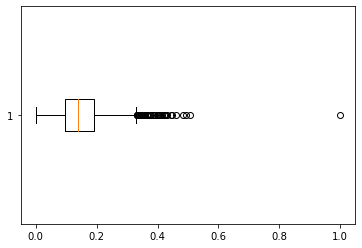

In [27]:
# Let's view the boxplot of target variable
plt.boxplot(y_target_scaled,vert=False)
plt.show()

In [28]:
# Now let's trim the target values such that we could get rid of outliers without losing the data
y_target_scaled = pd.DataFrame(y_target_scaled)
Q1=y_target_scaled.quantile(0.25) # 25th quantile
Q3=y_target_scaled.quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
y_target_scaled = np.clip(y_target_scaled, Lower_Whisker, Upper_Whisker, axis = 1)

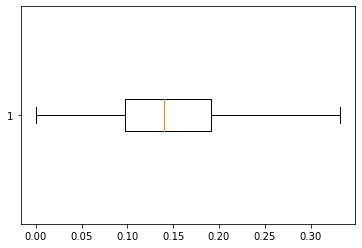

In [29]:
# View the boxplot again
plt.boxplot(y_target_scaled,vert=False)
plt.show()

#### Predict your test_df values using XGBoost:

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

y_target = train_data['y'].copy()
X_train,X_test,y_train,y_test = train_test_split(X_train_pca,y_target_scaled,test_size=0.2, random_state=1)

In [31]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred = xgb_reg.predict(X_test)

In [33]:
xgb_reg.score(X_test,y_test)

0.48188398645645425

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.04590403703855309

In [35]:
# predict test data
predictions_xgb_scaled = xgb_reg.predict(X_test_pca)
predictions_xgb_scaled = pd.DataFrame(predictions_xgb_scaled)

# transform it back to original scale
predictions_xgb = scaler_y.inverse_transform(predictions_xgb_scaled)
predictions_xgb

array([[ 78.044395],
       [ 95.921196],
       [ 81.82962 ],
       ...,
       [ 94.931404],
       [107.593094],
       [ 92.309784]], dtype=float32)

In [36]:
test_data['predictions_xgb'] = predictions_xgb

# rearrange the order of columns of test data such that it has the exact same order as the train data
cols = test_data.columns.to_list()
cols = cols[-1:] + cols[:-1]
test_data_xgb_pred = test_data[cols]

# view the top 5 rows of test data with the predictions
test_data_xgb_pred.head()

,predictions_xgb,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,78.044395,20,23,34,5,3,25,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,95.921196,40,3,7,0,3,25,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,81.829620,20,23,16,5,3,25,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,78.412888,20,13,34,5,3,25,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,121.156532,43,20,16,2,3,28,8,12,0,...,1,0,0,0,0,0,0,0,0,0
